In [ ]:
!nvidia-smi

Sun Apr  7 13:32:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.44 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
# from ultralytics import YOLO
# !yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True
# model = YOLO('yolov8n.pt')
# model.predict(
#    source='https://media.roboflow.com/notebooks/examples/dog.jpeg',
#    conf=0.25
# )

In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

# from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR_API_KEY")
# project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
# dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

# !pip install roboflow

# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="VriMqOMFHqzbZpVsMAt5")
# project = rf.workspace("cvproject-47gsu").project("hey_3")
# version = project.version(1)
# dataset = version.download("yolov8")


from roboflow import Roboflow

rf = Roboflow(api_key='VriMqOMFHqzbZpVsMAt5')
project = rf.workspace('cvproject-47gsu').project('hey_3')
dataset = project.version(1).download('yolov8')

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.44, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to hey_3-1 in yolov8:: 100%|██████████| 1100/1100 [00:00<00:00, 8660.01it/s]


## Custom Training

In [ ]:
# %cd {HOME}
# %cd '/.config/Ultralytics/settings.yaml'
# dataset.location

/content
[Errno 2] No such file or directory: '/.config/Ultralytics/settings.yaml'
/content


In [ ]:
import yaml

# Load existing data
with open('/content/datasets/hey_3-1/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Update paths
data['train'] = '/content/datasets/hey_3-1/train/images'
data['val'] = '/content/datasets/hey_3-1/valid/images'
data['test'] = '/content/datasets/hey_3-1/test/images'

# Write back to file
with open('/content/datasets/hey_3-1/data.yaml', 'w') as file:
    yaml.safe_dump(data, file)


In [ ]:
%cd {HOME}
# %cd /content/datasets

!yolo task=detect mode=train model=yolov8s.pt data={'/content/datasets/hey_3-1'}/data.yaml epochs=50 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 280MB/s]
Ultralytics YOLOv8.1.44 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/hey_3-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1712496999.baa6c4ebe41a.1552.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch960.jpg	weights
P_curve.png					    train_batch961.jpg
PR_curve.png					    train_batch962.jpg


/content


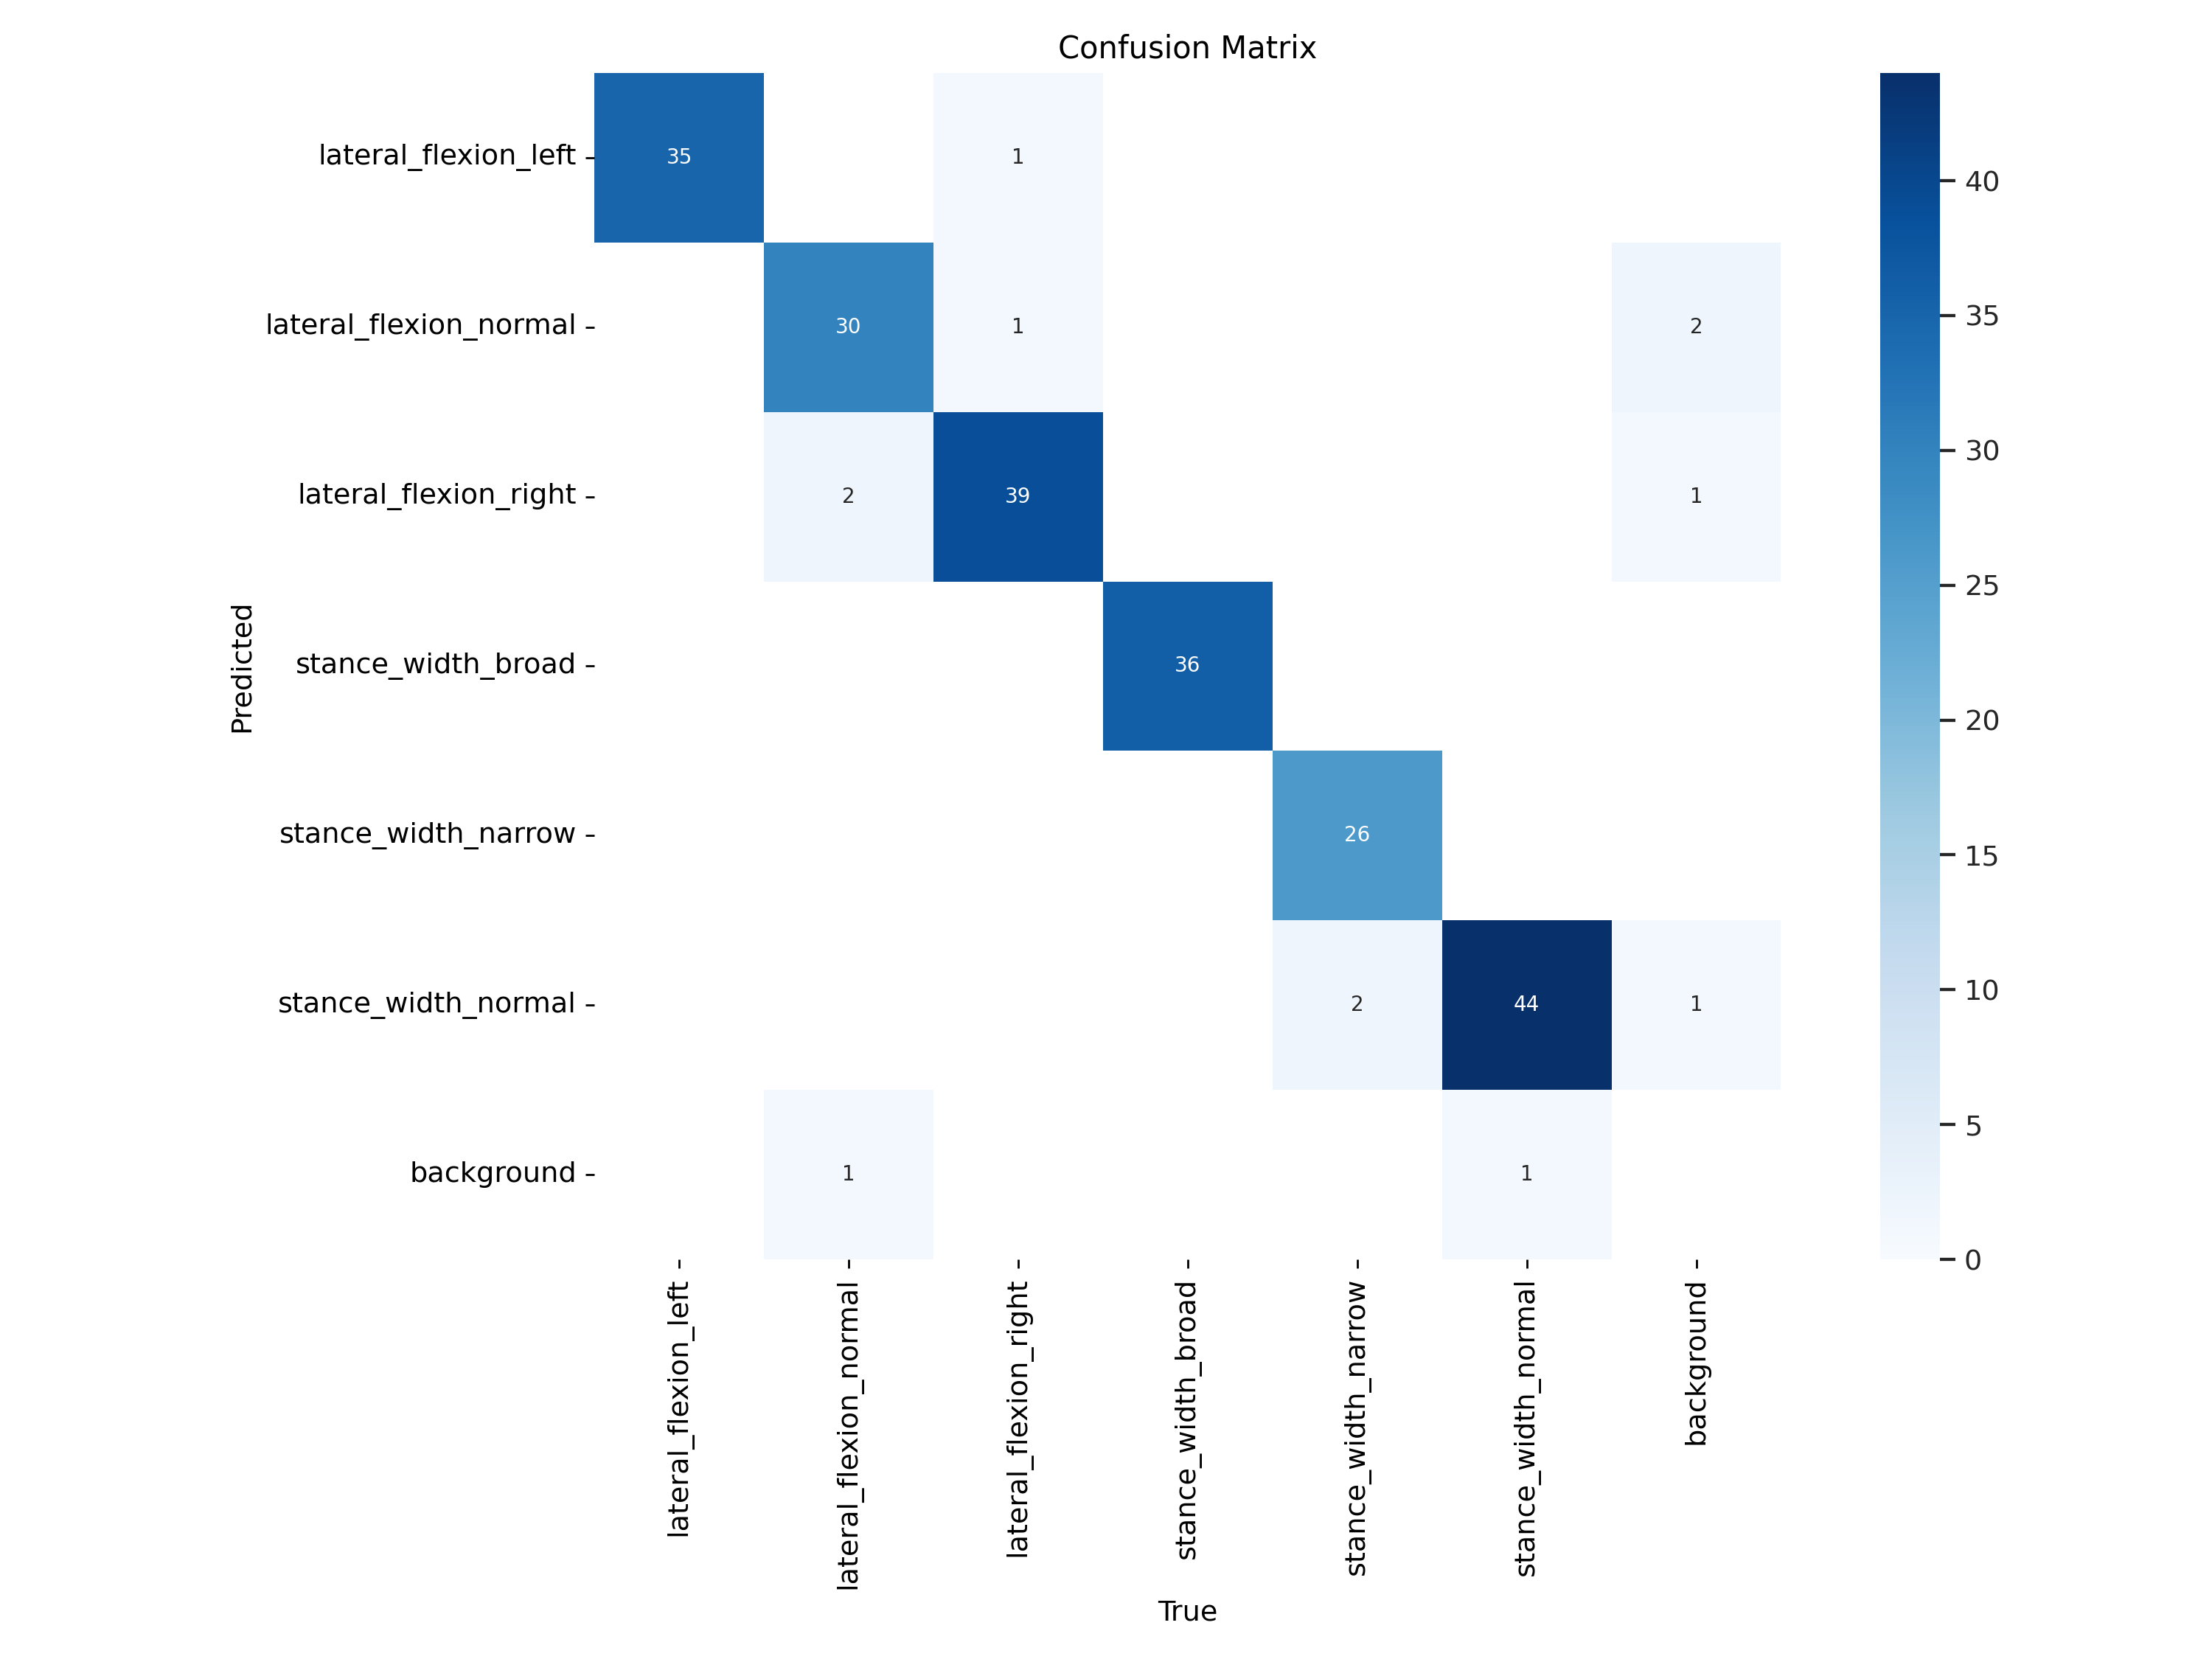

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


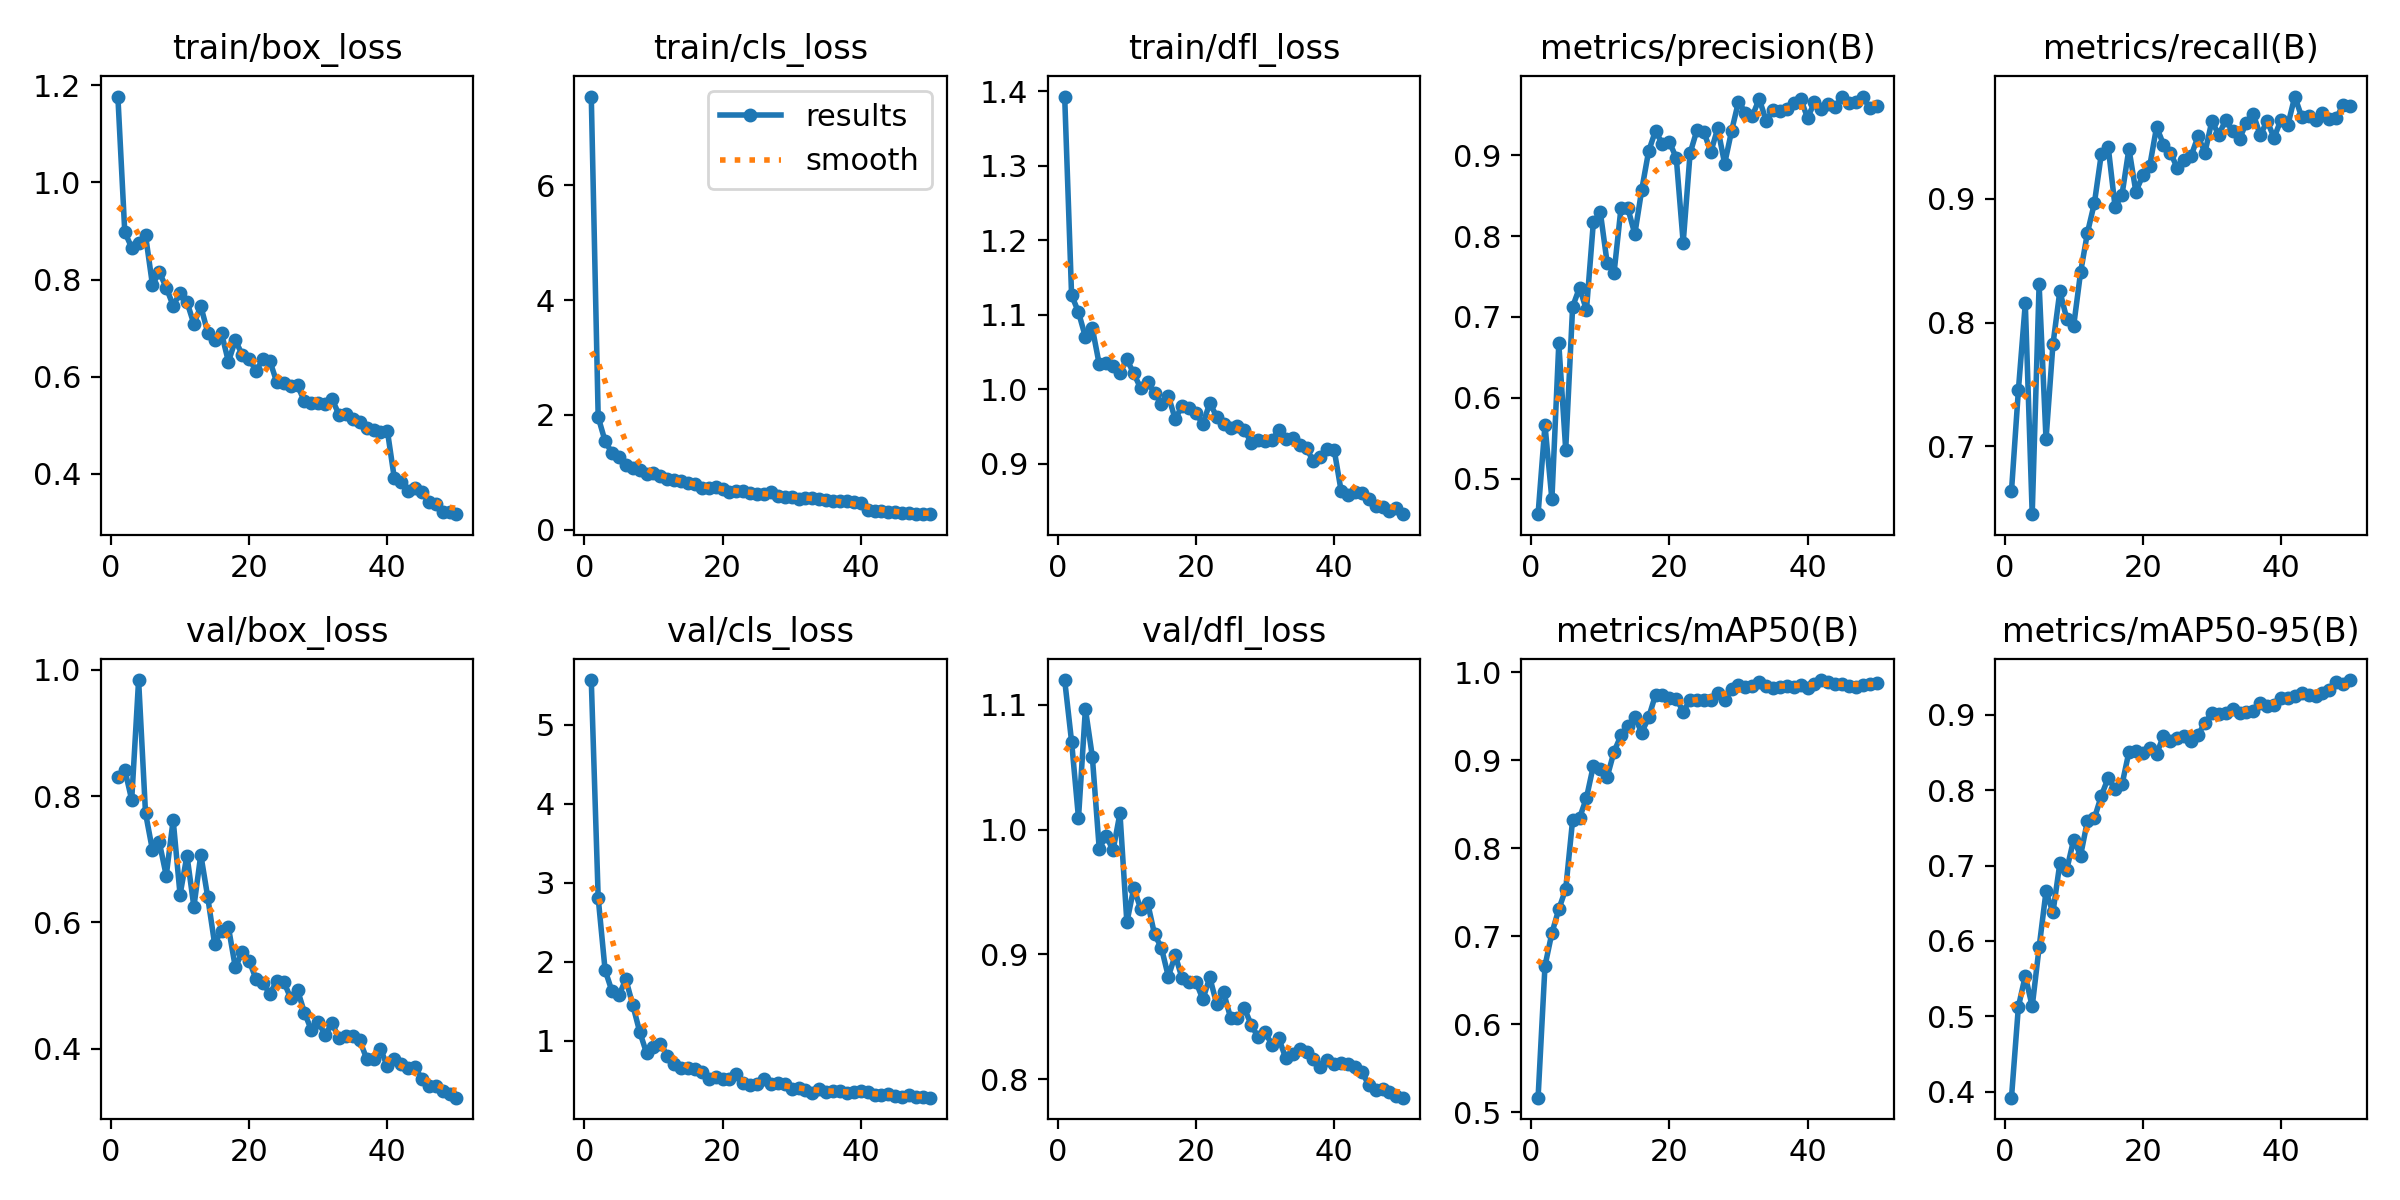

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


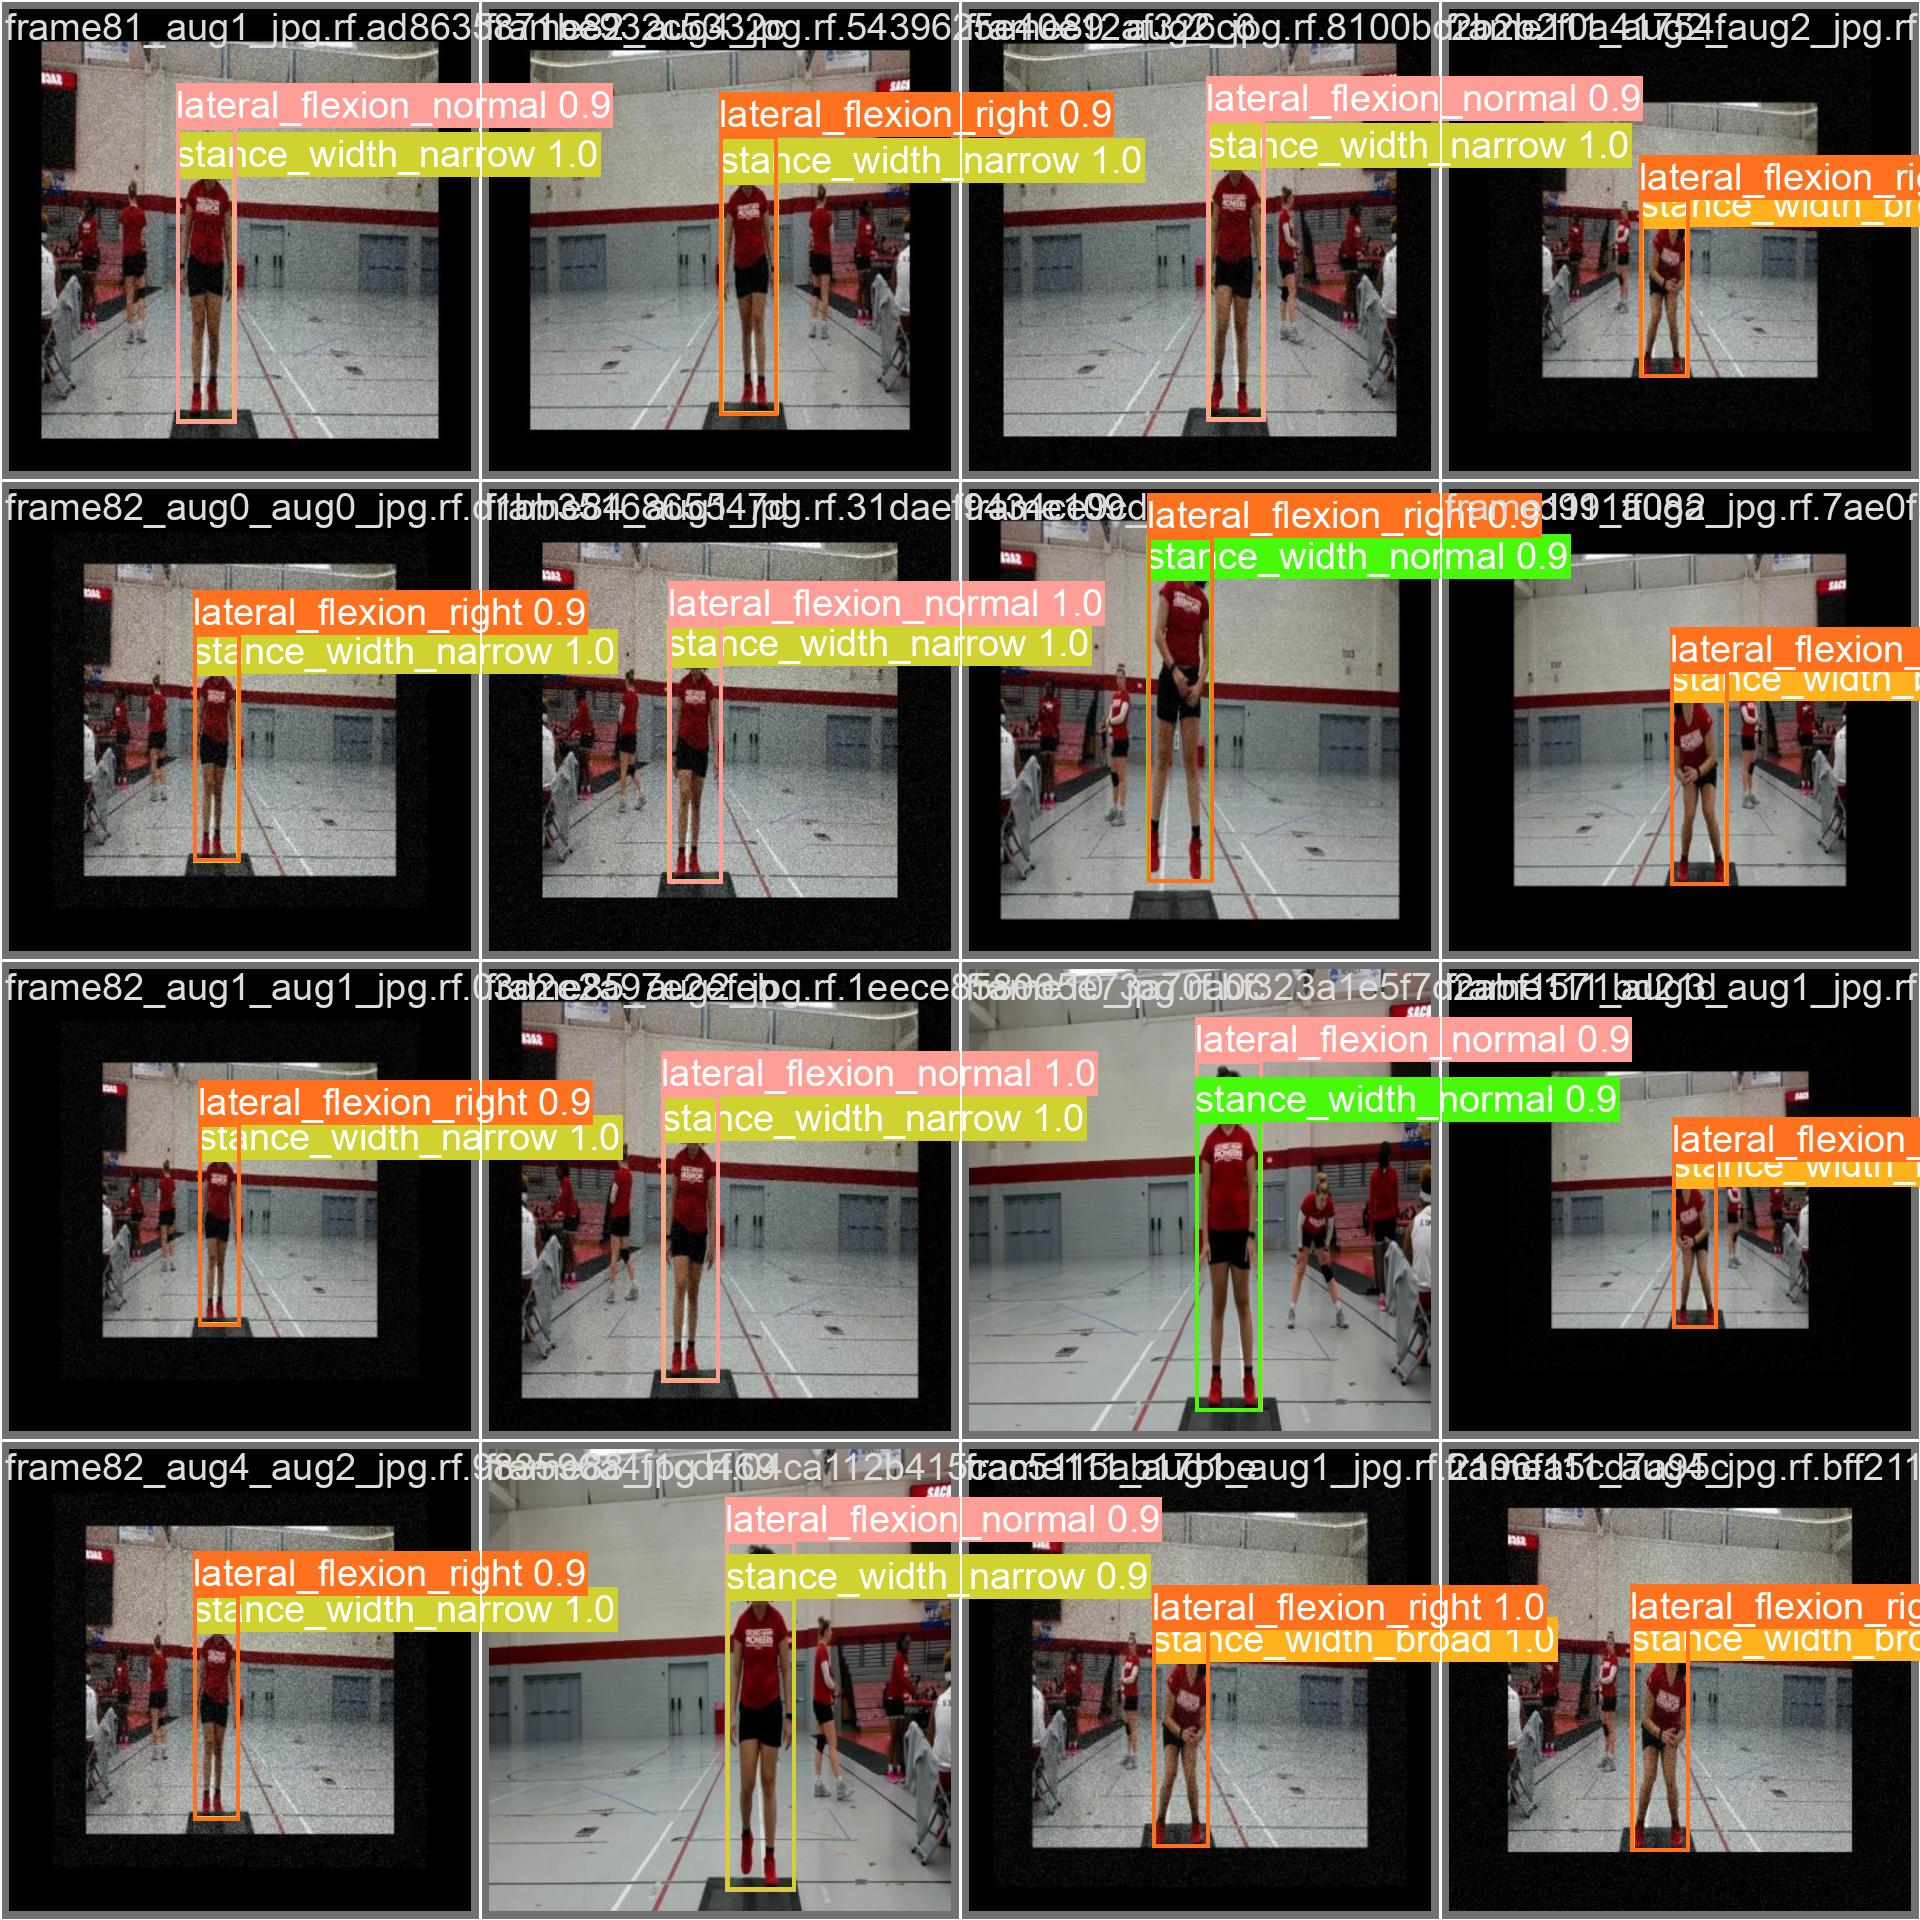

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.1.44 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/hey_3-1/valid/labels.cache... 109 images, 0 backgrounds, 0 corrupt: 100% 109/109 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:08<00:00,  1.28s/it]
                   all        109        218      0.961      0.975      0.988      0.945
  lateral_flexion_left        109         35      0.962          1      0.994      0.967
lateral_flexion_normal        109         33      0.966       0.97      0.987      0.923
 lateral_flexion_right        109         41      0.929      0.951      0.979      0.955
    stance_width_broad        109         36      0.984          1      0.995      0.983
   stance_width_narrow        109         28      0.981      0.929      0.986      0.926
   stance_width_normal        109  

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.1.44 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/54 /content/datasets/hey_3-1/test/images/frame104_aug5_jpg.rf.af0e2e6b6f3fd56f8cabeda97d0b6bb0.jpg: 800x800 1 lateral_flexion_right, 1 stance_width_normal, 22.2ms
image 2/54 /content/datasets/hey_3-1/test/images/frame108_jpg.rf.518c6c7745caef484c6f4f2ff0445247.jpg: 800x800 1 lateral_flexion_normal, 1 stance_width_normal, 22.2ms
image 3/54 /content/datasets/hey_3-1/test/images/frame111_aug0_jpg.rf.e01e599351a3a76ffc6b7281881ac639.jpg: 800x800 1 lateral_flexion_right, 1 stance_width_broad, 22.0ms
image 4/54 /content/datasets/hey_3-1/test/images/frame114_aug1_jpg.rf.25eba6ec4bad7cf7a080bfb29e08a840.jpg: 800x800 1 lateral_flexion_right, 1 stance_width_normal, 22.1ms
image 5/54 /content/datasets/hey_3-1/test/images/frame114_jpg.rf.839bc6c938c86f0ef0923f75ab5d04a0.jpg: 800x800 1 lateral_flexion_right, 1 stanc

**NOTE:** Let's take a look at few results.

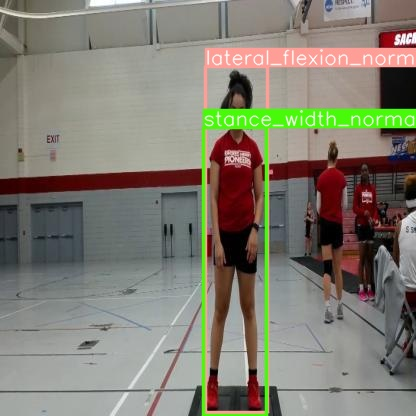

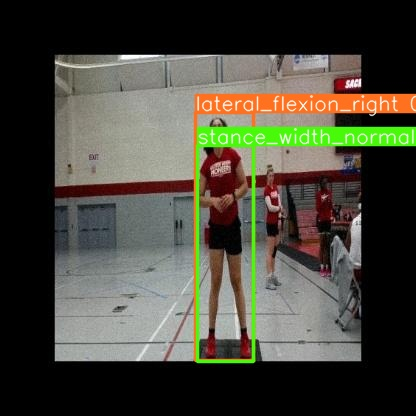

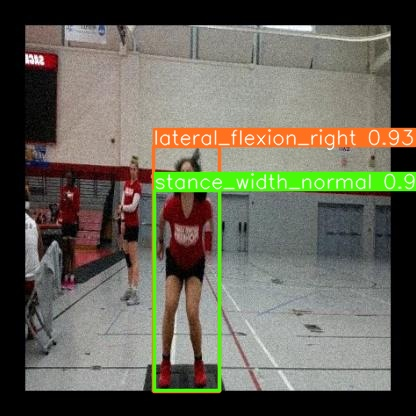

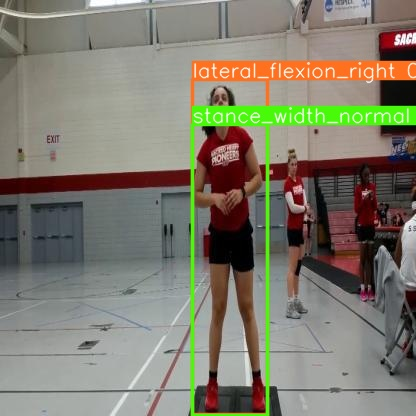

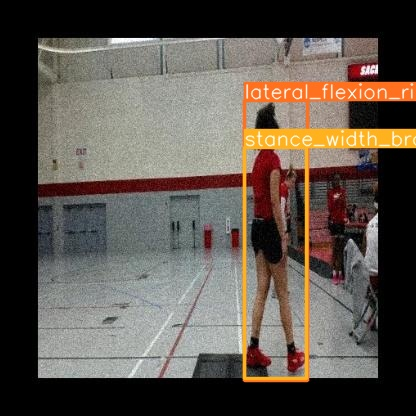

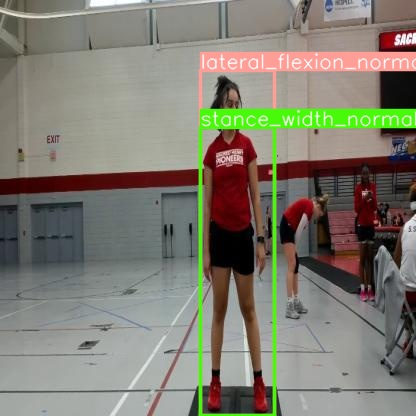

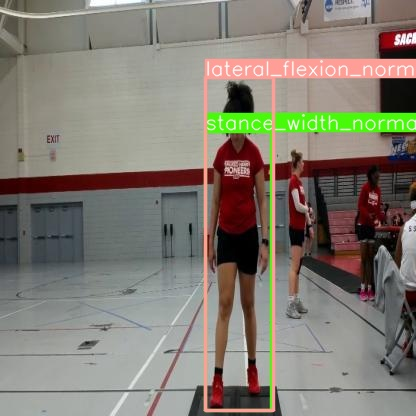

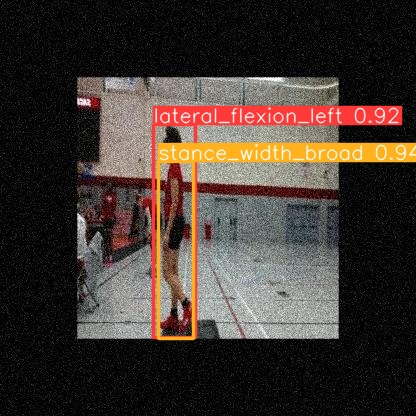

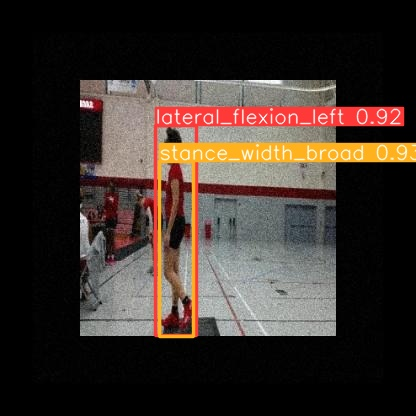

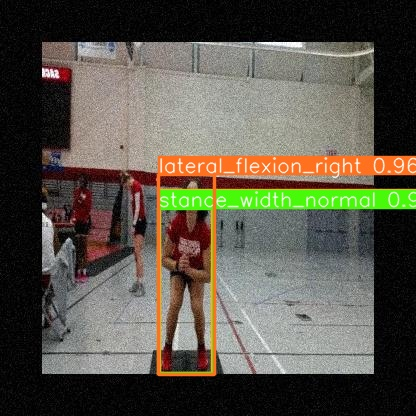

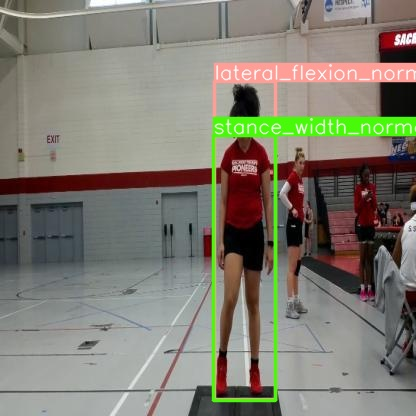

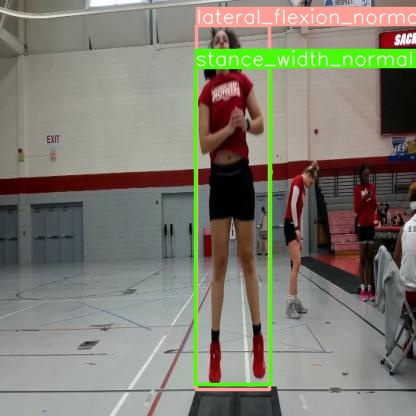

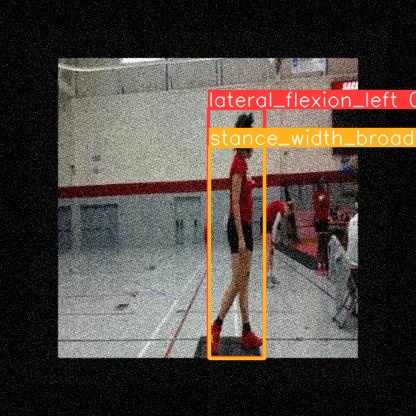

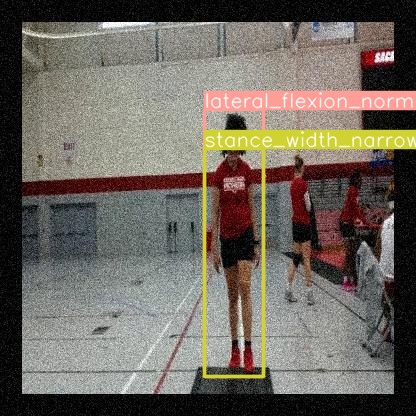

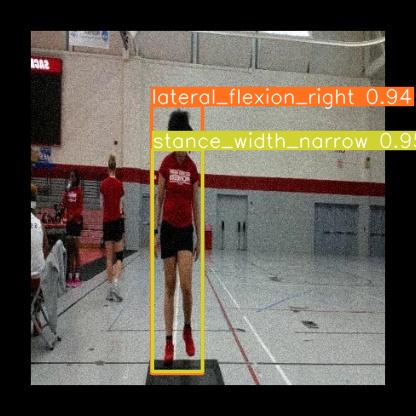

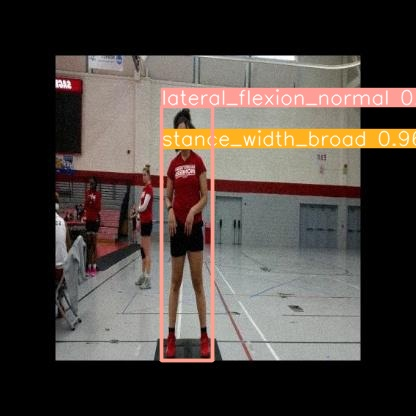

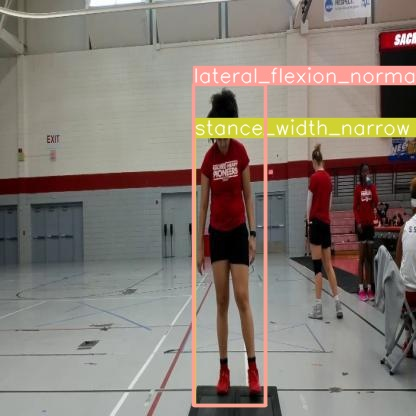

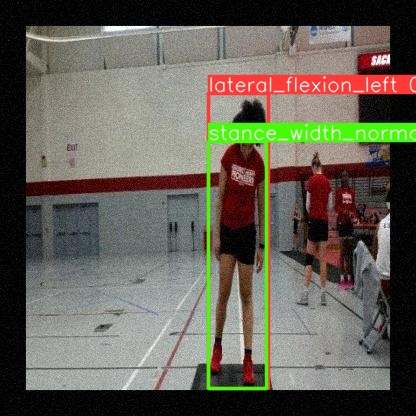

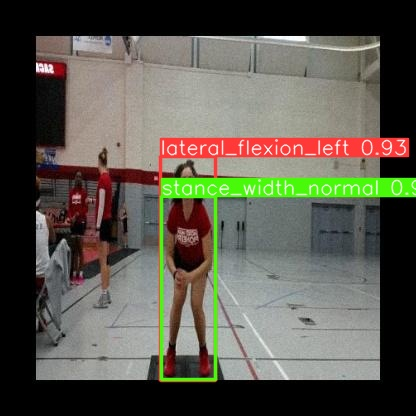

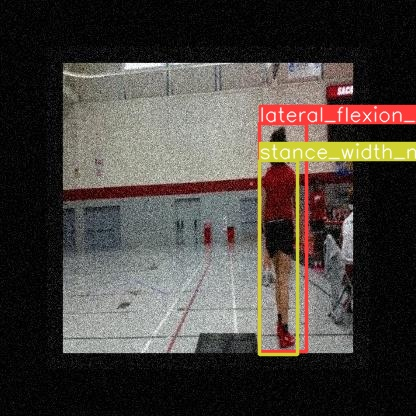

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")